## Exploratory Data Analysis of one 5 second Open Face Video

## Agenda

- What Are the descriptive Statisistics?
- What's the Regression?
- Next steps?

---

cd /Users/Kit/Dropbox/Disseration/Affective\ Computing/Data\ Analysis/Predictive-Modeling-Ant-Adaptation

# conventional way to import pandas

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# read CSV file directly from a computer and save the results as 'data'

In [74]:
data = pd.read_csv('Kit.csv', index_col=0)
data.head()

,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
frame,,,,,,,,,,,,,,,,,,,,,
1,0,0.000,0.93,1,0.109044,-0.043054,-0.993104,-0.045837,0.025897,-0.998613,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.033,0.93,1,0.125938,-0.046174,-0.990963,-0.056562,0.021908,-0.998159,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.066,0.93,1,0.112712,-0.040750,-0.992792,-0.028575,0.025315,-0.999271,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.100,0.98,1,0.108906,-0.028025,-0.993657,-0.060087,0.028403,-0.997789,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.133,0.93,1,0.106022,-0.011484,-0.994298,-0.020211,0.061377,-0.997910,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Make sure all columns make sense as a data types

data.dtypes #looks like their all floats, besides ID. Neat.

In [ ]:
#can drop useless columbs

#data = df.drop([‘Engine Fuel Type’, ‘Market Category’, ‘Vehicle Style’, ‘Popularity’, ‘Number of Doors’, ‘Vehicle Size’], axis=1)
data.head(5)

In [92]:
happinessintensity = data[' AU12_r']

In [79]:
#but instead, will make a new data frame of the data I am interested at moment, the intensity predictions
continuousAUdata = data[[' AU01_r', ' AU02_r',' AU04_r', ' AU05_r', ' AU06_r',' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r',' AU15_r', ' AU17_r', ' AU20_r',' AU23_r',' AU25_r', ' AU26_r', ' AU45_r' ] ]

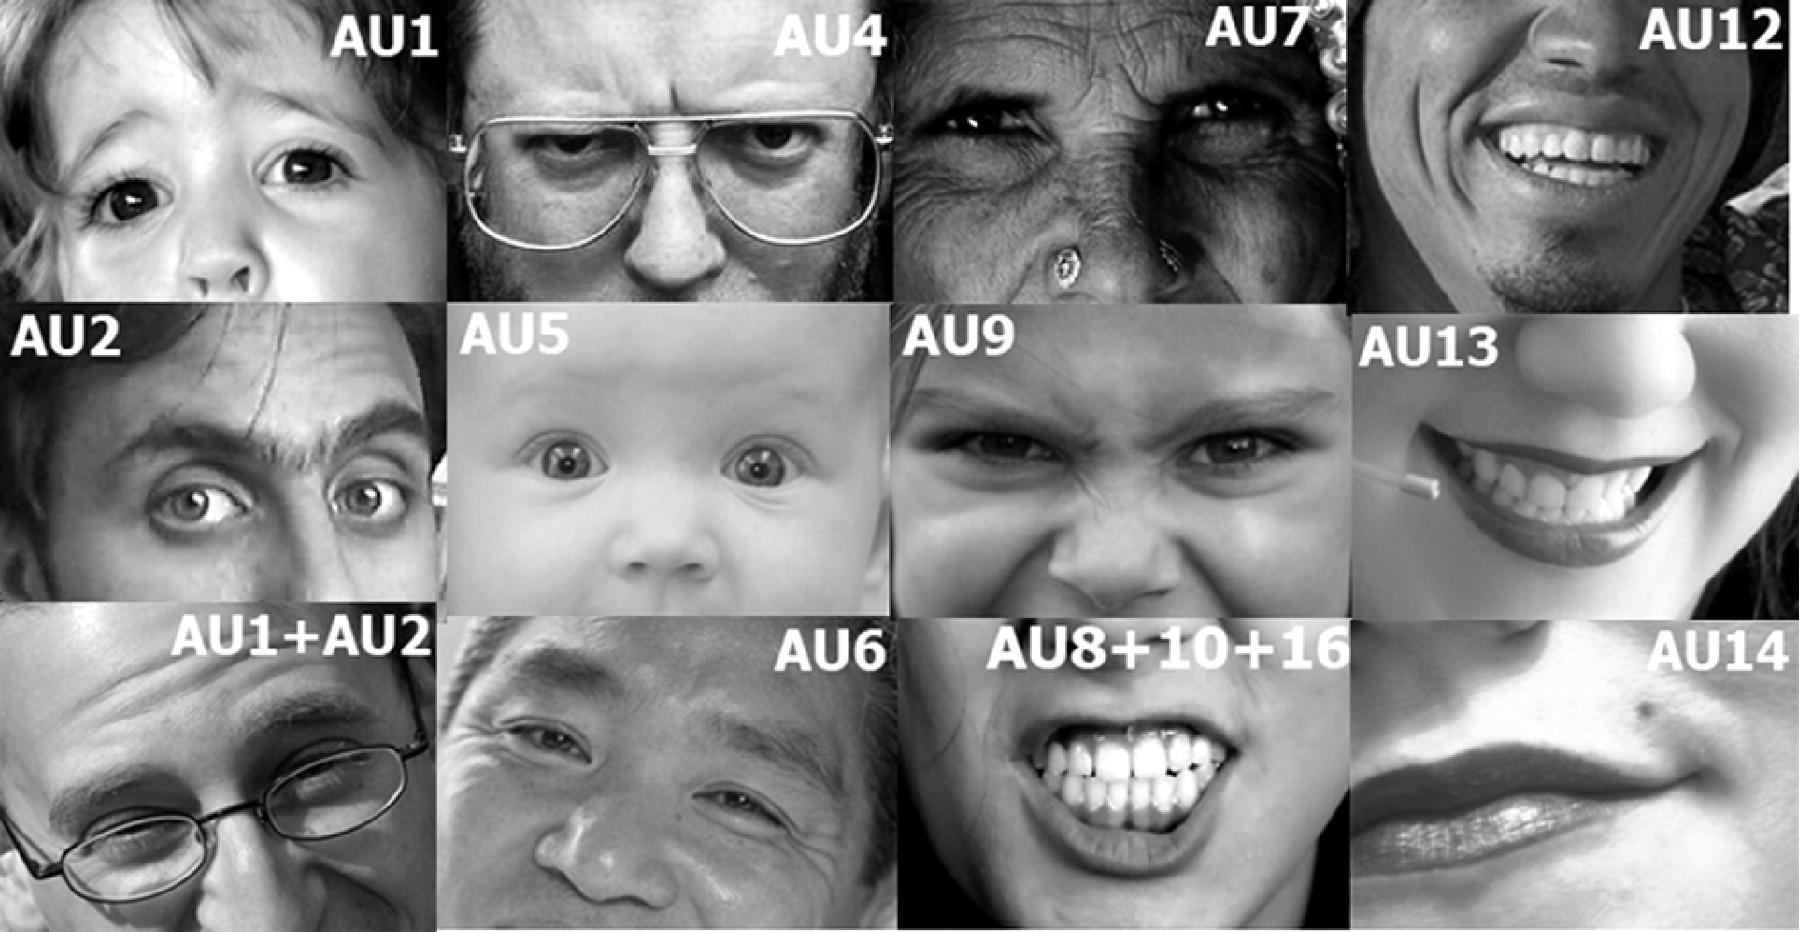
## from https://github.com/TadasBaltrusaitis/OpenFace/wiki/Action-Units


 

continuousAUdata.describe() # then I find the mean. Look, AU12_r, that is the most genuine smile, looks the highest mean. Looks like I was smiling a the most.

## but gosh, seems confusing with all those action unit names. Maybe we should rename them if we can. But what are those columns "really called". no one to one mapping with emotion.


# Renaming the column names
#continuousAUdata = data.rename(columns={“Engine HP”: “HP”, “Engine Cylinders”: “Cylinders”, “Transmission Type”: “Transmission”, “Driven_Wheels”: “Drive Mode”,”highway MPG”: “MPG-H”, “city mpg”: “MPG-C”, “MSRP”: “Price” })
#continuous.head(5)

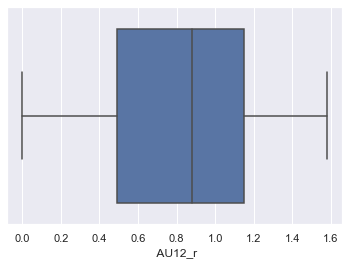

In [82]:
sns.boxplot(x=continuousAUdata[' AU12_r'])

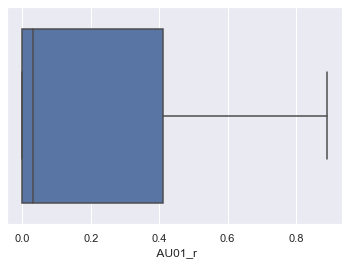

In [83]:
sns.boxplot(x=continuousAUdata[' AU01_r'])

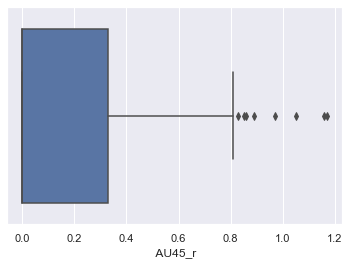

In [84]:
sns.boxplot(x=continuousAUdata[' AU45_r'])

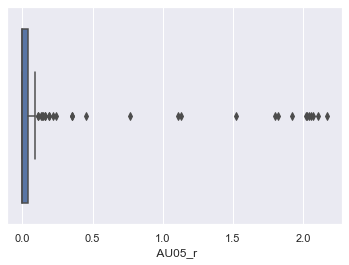

In [89]:
sns.boxplot(x=continuousAUdata[' AU05_r'])

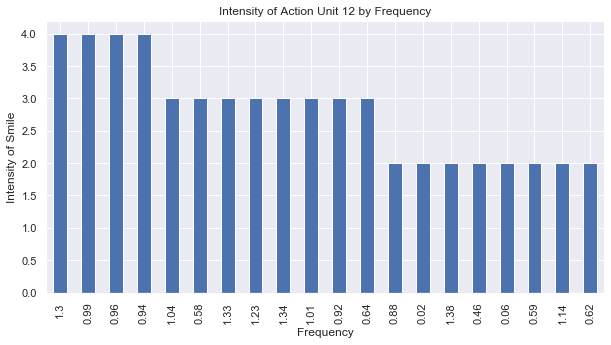

In [101]:
# Plotting a Histogram of Action Unit 12
data[' AU12_r'].value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Intensity of Action Unit 12 by Frequency")
plt.ylabel('Intensity of Smile')
plt.xlabel('Frequency');

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
AU01_r,1.000000,0.560383,0.194790,0.238418,-0.466871,0.120161,0.162790,0.444085,-0.423924,0.269896,0.537676,0.282940,0.064063,-0.151389,-0.403528,-0.428341,-0.347203
AU02_r,0.560383,1.000000,0.108155,0.512648,-0.194803,0.120012,0.139234,0.351811,0.043386,0.469115,0.596458,0.280343,-0.198944,-0.282143,-0.314712,-0.411268,-0.247622
AU04_r,0.194790,0.108155,1.000000,-0.438323,0.417682,0.473111,0.136319,0.349386,0.140461,0.316711,-0.062834,-0.251343,-0.479215,-0.416670,-0.024182,-0.214377,0.070140
AU05_r,0.238418,0.512648,-0.438323,1.000000,-0.321763,-0.129568,-0.024622,0.059777,0.171972,0.414360,0.599425,-0.024487,-0.105568,-0.183616,-0.090192,-0.230323,-0.223173
AU06_r,-0.466871,-0.194803,0.417682,-0.321763,1.000000,0.583234,0.033885,0.206204,0.659952,0.188140,-0.253838,-0.395084,-0.390229,-0.065324,0.505931,0.236921,0.343732
AU07_r,0.120161,0.120012,0.473111,-0.129568,0.583234,1.000000,0.106151,0.581638,0.472441,0.564050,0.285296,-0.070167,-0.241816,-0.176322,0.225763,-0.103866,-0.054713
AU09_r,0.162790,0.139234,0.136319,-0.024622,0.033885,0.106151,1.000000,0.262207,-0.287796,-0.005987,0.120757,0.225610,0.042425,-0.235157,-0.275822,-0.259048,0.103976
AU10_r,0.444085,0.351811,0.349386,0.059777,0.206204,0.581638,0.262207,1.000000,0.046226,0.405339,0.338078,0.229457,-0.110856,-0.271787,-0.181962,-0.322014,-0.111157
AU12_r,-0.423924,0.043386,0.140461,0.171972,0.659952,0.472441,-0.287796,0.046226,1.000000,0.589216,0.186925,-0.281454,-0.305484,-0.143100,0.365519,-0.038217,0.178602
AU14_r,0.269896,0.469115,0.316711,0.414360,0.188140,0.564050,-0.005987,0.405339,0.589216,1.000000,0.599871,-0.003804,-0.318363,-0.529815,-0.133530,-0.515452,0.049678


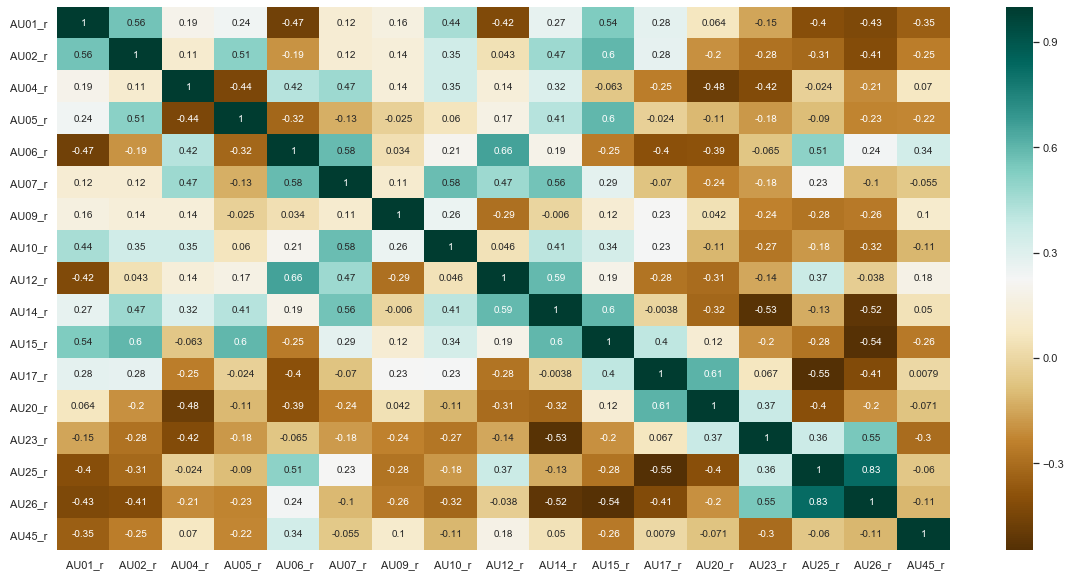

In [103]:
# Finding the relations between the variables, using a heat mapp to look at correlations between action units.
plt.figure(figsize=(20,10))
c= continuousAUdata.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## scatter plots

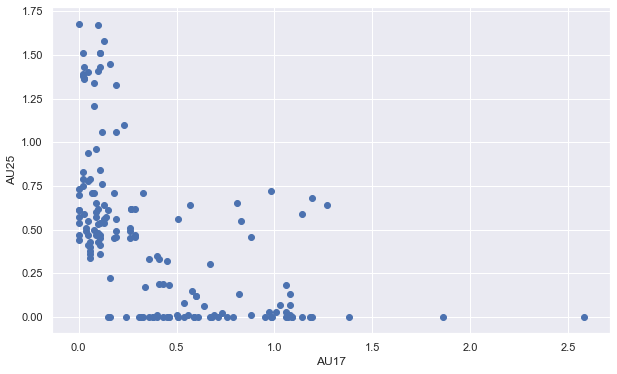

In [104]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(continuousAUdata[' AU17_r'], continuousAUdata[' AU25_r'])
ax.set_xlabel('AU17')
ax.set_ylabel('AU25')
plt.show()

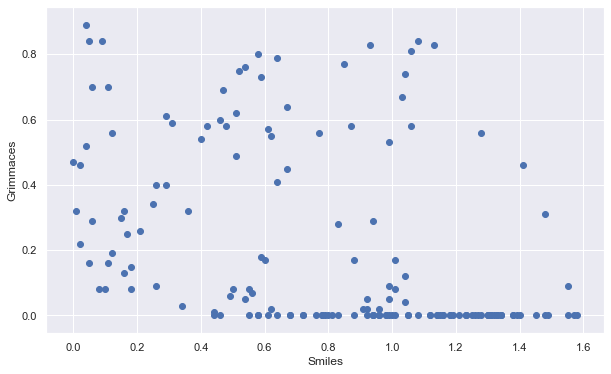

In [107]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(continuousAUdata[' AU12_r'], continuousAUdata[' AU01_r'])
ax.set_xlabel('Smiles')
ax.set_ylabel('Grimmaces')
plt.show()

For more on exploratory data analysis check out this link https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39c


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1  + \beta_2 + \beta_3  $

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [64]:
outputyassmileintensityAU12 =[(' AU01_r', 8.275829148782981e-16),
 (' AU02_r', -2.235088384814056e-16),
 (' AU04_r', -6.060309166129907e-16),
 (' AU05_r', -6.327312819161126e-16),
 (' AU06_r', -1.6792046651298477e-16),
 (' AU07_r', 3.378127135252564e-16),
 (' AU09_r', 7.565906966826529e-16),
 (' AU10_r', -5.320217687265534e-17),
 (' AU12_r', 1.0000000000000013),
 (' AU14_r', 2.744150064138349e-17),
 (' AU15_r', -7.363213734724919e-16),
 (' AU17_r', 2.917868897358266e-17),
 (' AU20_r', 3.652736758883737e-16),
 (' AU23_r', -3.9104154557373593e-16),
 (' AU25_r', 1.2874695341719892e-15),
 (' AU26_r', -7.205133856568617e-16),
 (' AU45_r', -1.389632620065477e-16)]
outputyassmileintensityAU12

[(' AU01_r', 8.275829148782981e-16),
 (' AU02_r', -2.235088384814056e-16),
 (' AU04_r', -6.060309166129907e-16),
 (' AU05_r', -6.327312819161126e-16),
 (' AU06_r', -1.6792046651298477e-16),
 (' AU07_r', 3.378127135252564e-16),
 (' AU09_r', 7.565906966826529e-16),
 (' AU10_r', -5.320217687265534e-17),
 (' AU12_r', 1.0000000000000013),
 (' AU14_r', 2.744150064138349e-17),
 (' AU15_r', -7.363213734724919e-16),
 (' AU17_r', 2.917868897358266e-17),
 (' AU20_r', 3.652736758883737e-16),
 (' AU23_r', -3.9104154557373593e-16),
 (' AU25_r', 1.2874695341719892e-15),
 (' AU26_r', -7.205133856568617e-16),
 (' AU45_r', -1.389632620065477e-16)]

In [51]:
# create a Python list of feature names
#import the action units (AU) from the Open Face Processed files. In the file, AU12_r is the intensity of a smile. 
#AU12_c is the boolean to determine if a a smile exists.
#note, in the open face feature file there is a leading space in the column names. These need to be included.
feature_cols = [' AU01_c',' AU01_r', ' AU12_c' ]
xfuller_cols = [' AU01_r', ' AU02_r',' AU04_r', ' AU05_r', ' AU06_r',' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r',' AU15_r', ' AU17_r', ' AU20_r',' AU23_r',' AU25_r', ' AU26_r', ' AU45_r'  ]
#AU04_r AU05_r	 AU06_r	 AU07_r	 AU09_r	 AU10_r	 AU12_r	 AU14_r	 AU15_r	 AU17_r	 AU20_r	 AU23_r	 AU25_r	 AU26_r	 AU45_r
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
Xfuller = data[xfuller_cols]
# equivalent command to do this in one line
#X = data[' AU01_r', 'AU01_c', 'AU12_r', 'AU12_c']

# print the first 5 rows
Xfuller.head()

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
frame,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.41,1.98,0.0,1.93,1.23,0.89,1.52,2.58,0.69,0.73,0.0,0.00,0.37
2,0.0,0.0,0.0,0.0,1.30,1.88,0.0,1.44,1.18,0.80,0.90,1.86,0.73,0.63,0.0,0.00,0.19
3,0.0,0.0,0.0,0.0,1.27,1.77,0.0,1.21,1.18,0.55,0.62,1.38,0.63,0.57,0.0,0.00,0.07
4,0.0,0.0,0.0,0.0,1.25,1.79,0.0,1.22,1.19,0.39,0.58,1.07,0.50,0.50,0.0,0.00,0.09
5,0.0,0.0,0.0,0.0,1.26,1.68,0.0,1.15,1.16,0.25,0.64,1.06,0.49,0.49,0.0,0.01,0.17


In [22]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(161, 4)


In [52]:
# select a Series from the DataFrame

y = data[' AU12_r'] #y is set to intensity of smile, au12_r

# equivalent command that works if there are no spaces in the column name
#y = data.sales

# print the first 5 values
y.head()

frame
1    1.23
2    1.18
3    1.18
4    1.19
5    1.16
Name:  AU12_r, dtype: float64

In [25]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(161,)


## Splitting X and y into training and testing sets

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfuller, y, random_state=1)

In [54]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 17)
(120,)
(41, 17)
(41,)


## Linear regression in scikit-learn

**Step 1:** Import the class you plan to use

In [28]:
# import model
from sklearn.linear_model import LinearRegression


**Step 2:** "Instantiate" the "estimator"

In [37]:
# instantiate
linreg = LinearRegression()


**Step 3:** Fit the model with data (aka "model training")

In [55]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting model coefficients

In [56]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-1.2212453270876722e-15
[ 8.27582915e-16 -2.23508838e-16 -6.06030917e-16 -6.32731282e-16
 -1.67920467e-16  3.37812714e-16  7.56590697e-16 -5.32021769e-17
  1.00000000e+00  2.74415006e-17 -7.36321373e-16  2.91786890e-17
  3.65273676e-16 -3.91041546e-16  1.28746953e-15 -7.20513386e-16
 -1.38963262e-16]


In [57]:
# pair the feature names with the coefficients
Matrix = zip(xfuller_cols, linreg.coef_)
list(Matrix) #list displays the result of a zip in python 3 and later, otherwise ya get an iteratable

[(' AU01_r', 8.275829148782981e-16),
 (' AU02_r', -2.235088384814056e-16),
 (' AU04_r', -6.060309166129907e-16),
 (' AU05_r', -6.327312819161126e-16),
 (' AU06_r', -1.6792046651298477e-16),
 (' AU07_r', 3.378127135252564e-16),
 (' AU09_r', 7.565906966826529e-16),
 (' AU10_r', -5.320217687265534e-17),
 (' AU12_r', 1.0000000000000013),
 (' AU14_r', 2.744150064138349e-17),
 (' AU15_r', -7.363213734724919e-16),
 (' AU17_r', 2.917868897358266e-17),
 (' AU20_r', 3.652736758883737e-16),
 (' AU23_r', -3.9104154557373593e-16),
 (' AU25_r', 1.2874695341719892e-15),
 (' AU26_r', -7.205133856568617e-16),
 (' AU45_r', -1.389632620065477e-16)]

$$y_{AU12-r-intensity-of-smile} = 0.973 + -0.25 \times AU01_{c-intensity-of-grimmace} + -0.4 \times AU01_{r-presence-of-grimmace}$$

How do we interpret the ** intensity of grimmace coefficient** (-0.25)?

- For a given intensity of smiles (y), **a "unit" increase in grimmace intensity** is associated with a **-0.25 "unit" increase in smiles**
- Or more clearly: For a given intensity of smile, **an additional 1,000 intensity of smille is associated with an **decrease in frown intensity of -250**

Important notes:

- This is a statement of **association**, not **causation**
- If an intensity of smiles is associated with a **decrease** in sales, $\beta_1$ would be **negative**

**Step 4:** Predict the response for a new observation



In [105]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems

Instead, we need evaluation metrics designed for comparing continuous values

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [42]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors: (outputs in values of y, nice!)

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [43]:
# calculate RMSE by hand
import numpy as np
from sklearn import metrics
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [44]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [45]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error
- **MSE** "punishes" larger errors
- **RMSE** is interpretable in the "y" units

### Computing the RMSE for our Sales predictions

In [106]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

8.937986543504678e-16


## Cross-validation example: feature selection

**Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [21]:
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6913531708051797


In [22]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090768


## Research Questions
4.	What new can we learn from physiological measures of affective states, while people engage with a museum exhibit?
5.	Is there a relationship between high stimulation and learning as measured by CDM and affective computing signals? Within learning moments, is there a relationship between positive affect and learning? 

## okay, so we found the the connections between action units (AUs) but how does that connect to Emotions?

For a review see here: https://imotions.com/blog/facial-action-coding-system/#emotions-action-units

Emotions are simply a combination of Actions Units, for example:

Happiness / Joy =	6 + 12 Cheek Raiser, Lip Corner Puller

Sadness =	1 + 4 + 15	Inner Brow Raiser, Brow Lowerer, Lip Corner Depressor

Surprise	1 + 2 + 5 + 26	Inner Brow Raiser, Outer Brow Raiser, Upper Lid Raiser, Jaw Drop

Fear	1 + 2 + 4 + 5 + 7 + 20 + 26	Inner Brow Raiser, Outer Brow Raiser, Brow Lowerer, Upper Lid Raiser, Lid Tightener, Lip Stretcher, Jaw Drop

Anger	4 + 5 + 7 + 23	Brow Lowerer, Upper Lid Raiser, Lid Tightener, Lip Tightener

Disgust	9 + 15 + 16	Nose Wrinkler, Lip Corner Depressor, Lower Lip Depressor

Contempt	12 + 14 (on one side of the face)	Lip Corner Puller, Dimpler



## but how do we combine the AU? is is just AUx + AUy? wouldn't that lead to lots of different kinds of happiness and such? or is it just boolean, presence pressence? Seems like, you can just make it up how you like.